# 50 per cent presentation

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.5)

In [2]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_angle_from_history, calculate_winning_pattern_from_distances
from analysis_functions import calculate_patterns_timings, calculate_recall_success
from analysis_functions import calculate_recall_success_sequences, calculate_recall_time_quantities
from plotting_functions import plot_weight_matrix, plot_winning_pattern, plot_network_activity
from plotting_functions import plot_network_activity_angle

## Example of filters

In [3]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 's', 'z_pre', 'z_post', 'p_pre', 'p_post', 'p_co', 'z_co', 'w']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 1

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

In [4]:
o = manager.history['o']
z_pre = manager.history['z_pre']
z_post = manager.history['z_post']
w = manager.history['w']
p_pre = manager.history['p_pre']
p_post = manager.history['p_post']

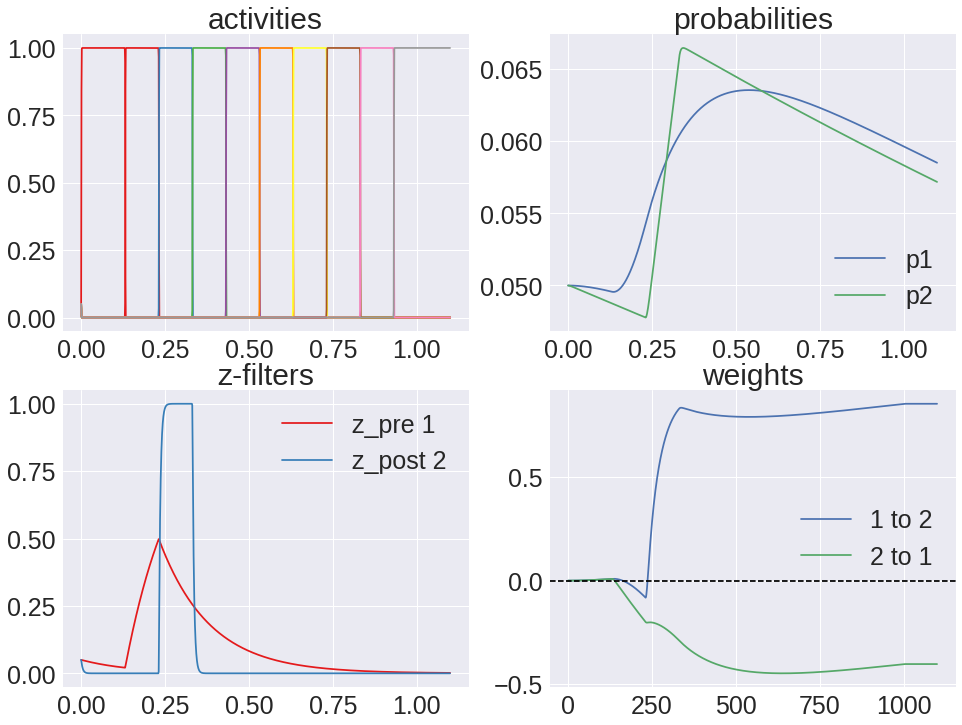

In [5]:
pattern_from = 1
pattern_to = 2

time = np.arange(0, n_patterns * training_time + inter_sequence_interval, dt)

cmap = matplotlib.cm.Set1
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_patterns)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
for i in range(n_patterns):
    ax1.plot(time, o[:, i], color=cmap(norm(i)))
    
ax1.set_title('activities')    

ax2 = fig.add_subplot(223)
ax2.plot(time, z_pre[:, pattern_from], label='z_pre 1', color=cmap(norm(pattern_from)))
ax2.plot(time, z_post[:, pattern_to], label='z_post 2', color=cmap(norm(pattern_to)))

ax2.set_title('z-filters')
ax2.legend()

ax3 = fig.add_subplot(222)
ax3.plot(time, p_pre[:, pattern_from], label='p1')
ax3.plot(time, p_post[:, pattern_to], label='p2')
ax3.set_title('probabilities')
ax3.legend()

ax4 = fig.add_subplot(224)
ax4.set_title('weights')
ax4.plot(time, w[:, pattern_to, pattern_from], label='1 to 2')
ax4.plot(time, w[:, pattern_from, pattern_to], label='2 to 1')
ax4.axhline(0, ls='--', color='black')

ax4.legend();

## Training

In [6]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 's', 'z_pre', 'z_post', 'p_pre', 'p_post', 'p_co', 'z_co', 'w']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 10

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True,  values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)
('epochs', 3)
('epochs', 4)
('epochs', 5)
('epochs', 6)
('epochs', 7)
('epochs', 8)
('epochs', 9)


In [7]:
w_history = epoch_history['w']

from_pattern = 0
w_epoch = [w_t[:, from_pattern].reshape(nn.hypercolumns, nn.minicolumns) for w_t in w_history]
w_epoch = [np.mean(w, axis=0) for w in w_epoch]
w_epoch = np.array(w_epoch)

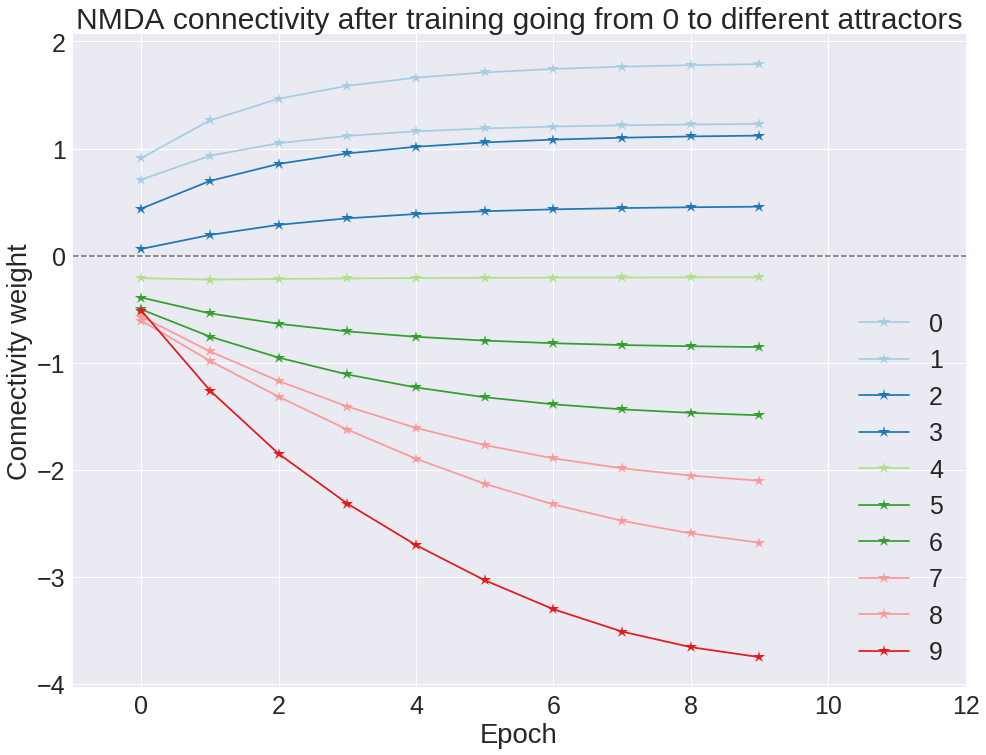

In [8]:
cmap_string = 'nipy_spectral'
cmap_string = 'hsv'
cmap_string = 'Paired'

cmap = matplotlib.cm.get_cmap(cmap_string)
norm = matplotlib.colors.Normalize(vmin=0, vmax=minicolumns)

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, w in enumerate(w_epoch.T):
    if index < n_patterns:
        ax.plot(w, '*-', color=cmap(norm(index)), markersize=13, label=str(index))

ax.axhline(y=0, color='gray', linestyle='--')
ax.set_xlim([-1, epochs + 2])
ax.set_xlabel('Epoch')
ax.set_ylabel('Connectivity weight')
ax.set_title('NMDA connectivity after training going from 0 to different attractors')
ax.legend();

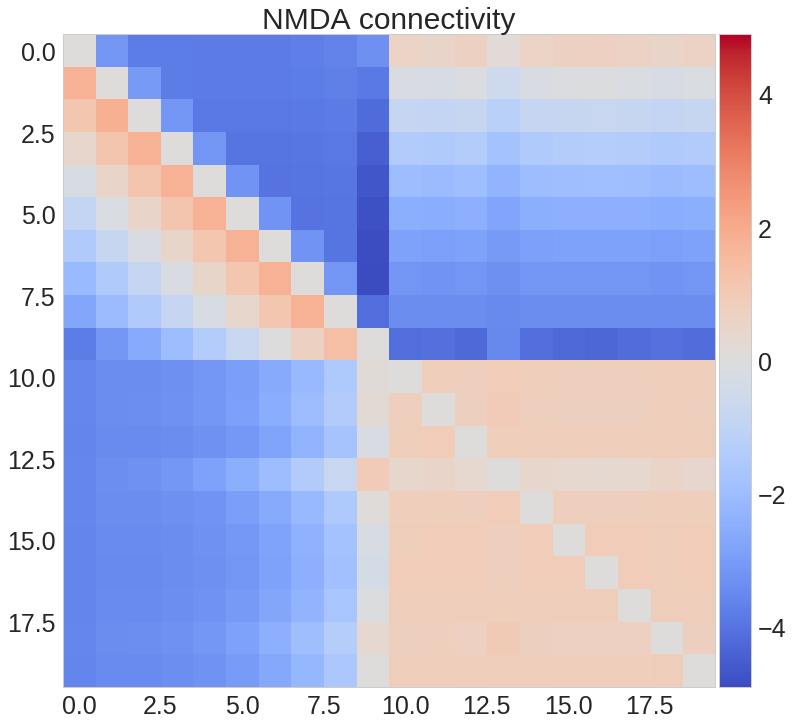

In [9]:
plot_weight_matrix(manager.nn)

In [10]:
T_recall = 5.0
T_cue = 0.100
n = 1
aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])


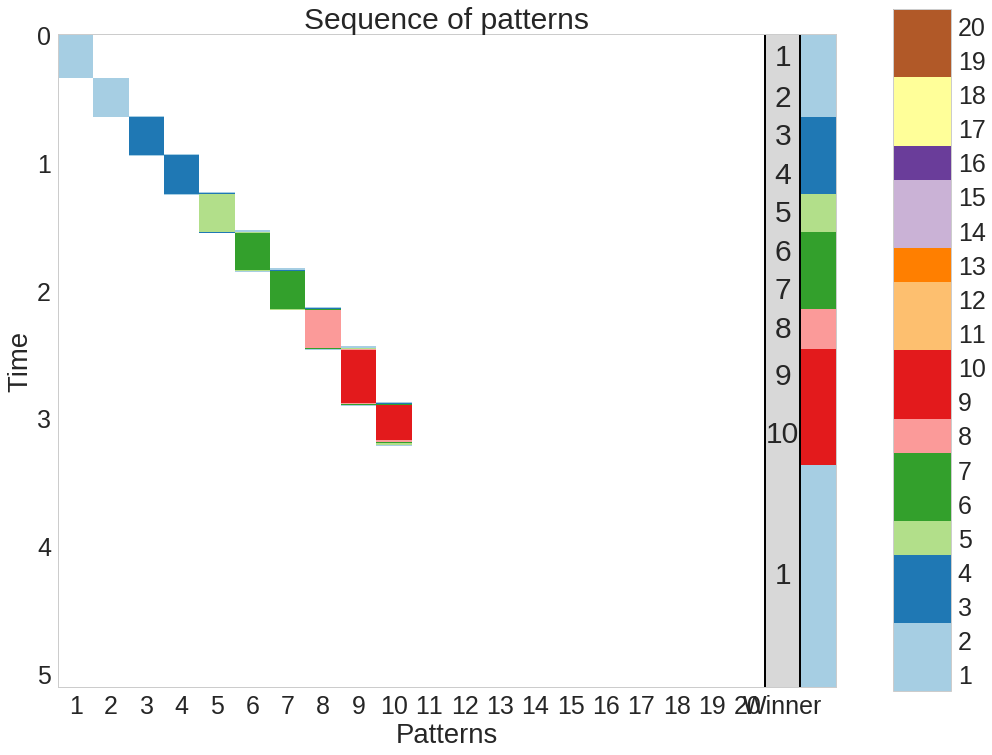

In [11]:
plot_winning_pattern(manager)

## AMPA and NMDA

In [46]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 'a', 'z_pre', 'p_pre']
    
# Protocol
training_time = 1.000
inter_sequence_interval = 1.0
inter_pulse_interval = 0.100
epochs = 3

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

('epochs', 0)
('epochs', 1)
('epochs', 2)


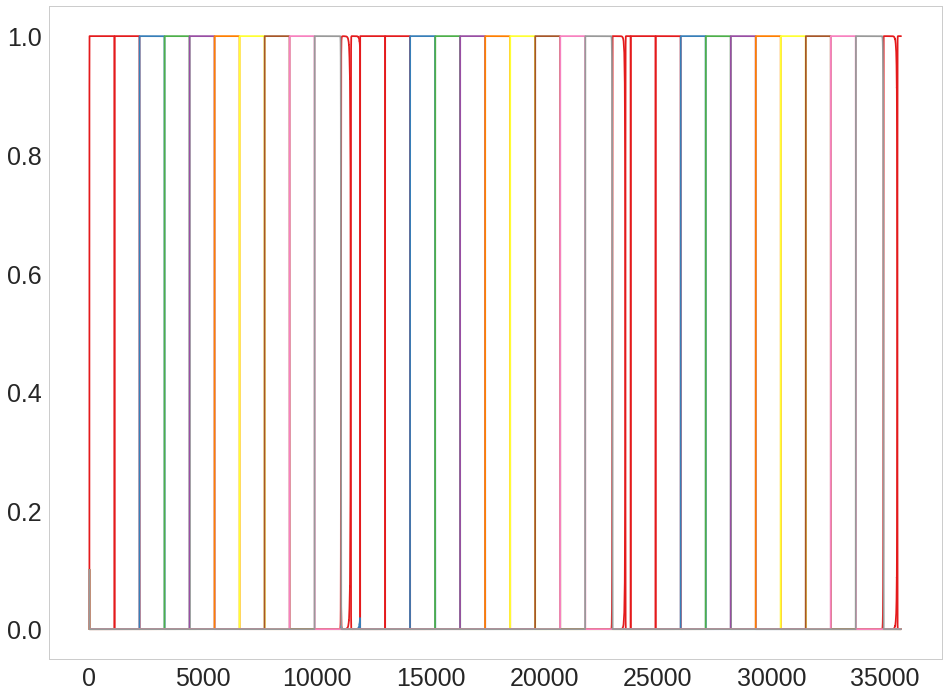

In [47]:
pattern_from = 1
pattern_to = 2
o = manager.history['o']
time = np.arange(0, n_patterns * training_time + inter_sequence_interval, dt)

cmap = matplotlib.cm.Set1
norm = matplotlib.colors.Normalize(vmin=0, vmax=n_patterns)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(111)
for i in range(n_patterns):
    ax1.plot(o[:, i], color=cmap(norm(i)))
    


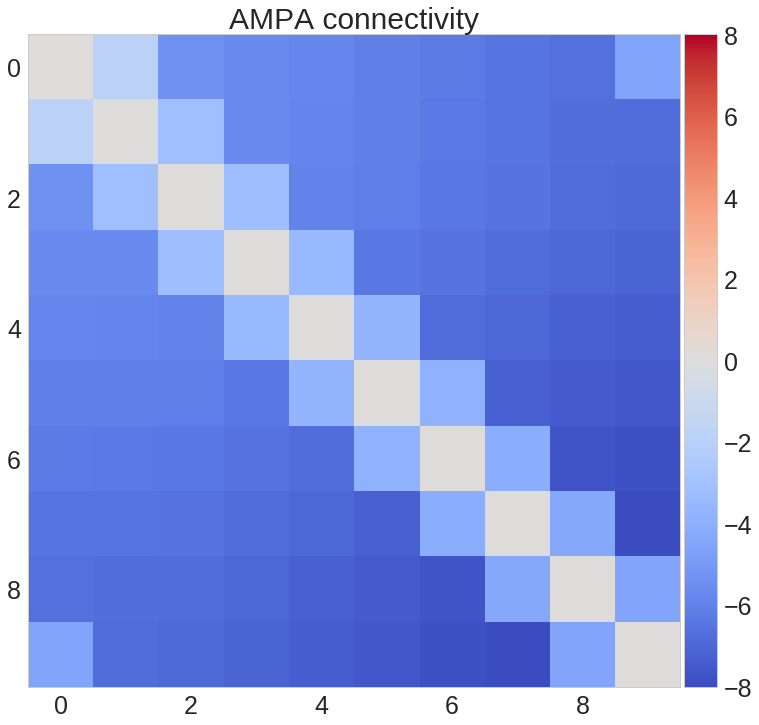

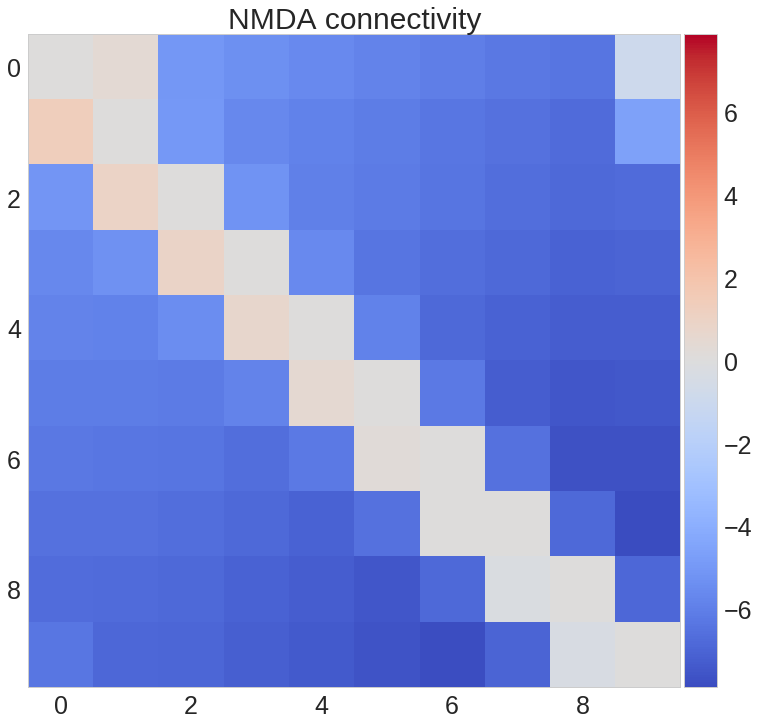

In [49]:
plot_weight_matrix(manager.nn, ampa=True)
plot_weight_matrix(manager.nn)

In [53]:
T_recall = 5.0
T_cue = 0.100
n = 1
manager.nn.g_w = 0.0
manager.nn.g_w_ampa = 1.0
aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])

In [56]:
aux

(5.1070000000000011,
 0.65828571428571436,
 0.017102333054831081,
 0.0,
 [(0, 0.48199999999999998, 0.0, 0.48099999999999998),
  (1, 0.63100000000000001, 0.48099999999999998, 1.111),
  (2, 0.64400000000000002, 1.111, 1.754),
  (3, 0.65100000000000002, 1.754, 2.4039999999999999),
  (4, 0.65700000000000003, 2.4039999999999999, 3.0600000000000001),
  (5, 0.66400000000000003, 3.0600000000000001, 3.7229999999999999),
  (6, 0.67700000000000005, 3.7229999999999999, 4.399),
  (7, 0.68400000000000005, 4.399, 5.0819999999999999),
  (8, 0.017000000000000001, 5.0819999999999999, 5.0979999999999999)])

In [54]:
nn.get_parameters()

{'G': 1.0,
 'epsilon': 1e-20,
 'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 0.0,
 'g_w_ampa': 1.0,
 'k': 0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 5.0,
 'tau_z_post': 0.005,
 'tau_z_post_ampa': 0.005,
 'tau_z_pre': 0.15,
 'tau_z_pre_ampa': 0.005}

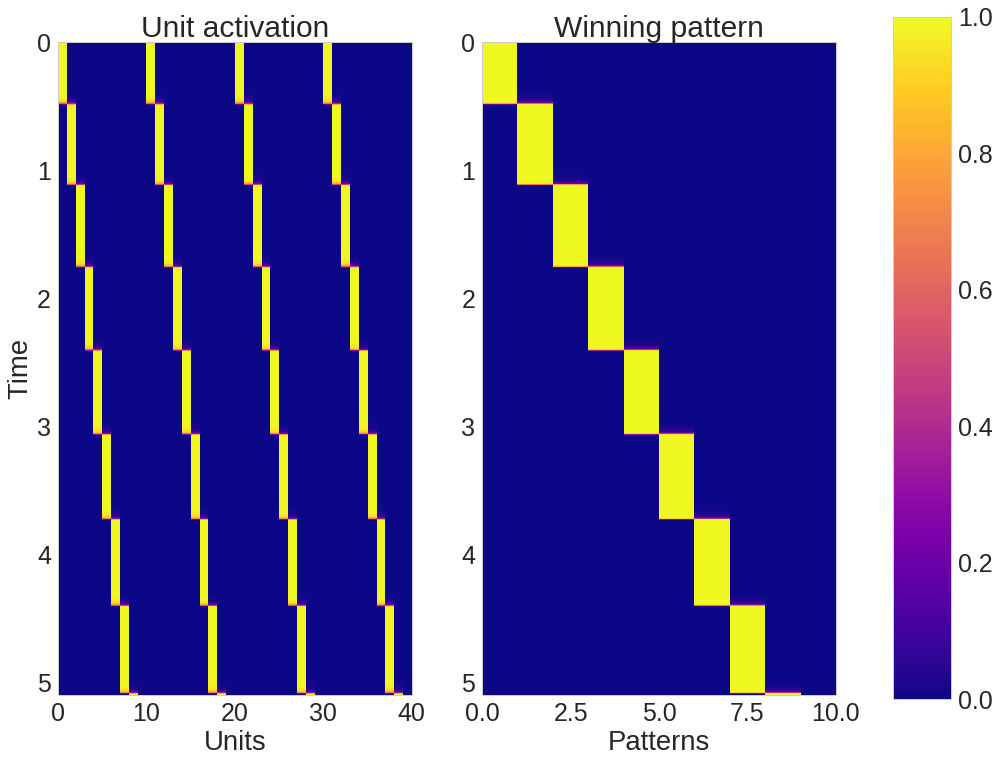

In [55]:
T_total = manager.T_total
history = manager.history
# Get the angles
angles = calculate_angle_from_history(manager)

# Plot
with sns.axes_style("whitegrid", {'axes.grid': False}):

    cmap = 'plasma'
    extent1 = [0, manager.nn.minicolumns * manager.nn.hypercolumns, T_total, 0]
    extent2 = [0, manager.nn.minicolumns, T_total, 0]

    fig = plt.figure(figsize=(16, 12))

    ax1 = fig.add_subplot(121)
    im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent1)
    ax1.set_title('Unit activation')

    ax1.set_xlabel('Units')
    ax1.set_ylabel('Time')

    ax2 = fig.add_subplot(122)
    im2 = ax2.imshow(angles, aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent2)
    ax2.set_title('Winning pattern')
    ax2.set_xlabel('Patterns')

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
    fig.colorbar(im1, cax=cbar_ax);

## Noise

In [75]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

sigma_vector = np.arange(1, 12, 2.0)

sigma = 15.0

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns, sigma=sigma, tau_p=10.0)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])

('epochs', 0)
('epochs', 1)
('epochs', 2)


In [76]:
aux

(0,
 0,
 0,
 0.0,
 [(0, 0.29399999999999998, 0.0, 0.29299999999999998),
  (1, 0.159, 0.29899999999999999, 0.45700000000000002),
  (2, 0.183, 0.45700000000000002, 0.63900000000000001),
  (3, 0.032000000000000001, 0.63900000000000001, 0.67000000000000004),
  (4, 0.010999999999999999, 0.67100000000000004, 0.68100000000000005),
  (4, 0.02, 0.68800000000000006, 0.70699999999999996),
  (3, 0.017000000000000001, 0.72799999999999998, 0.74399999999999999),
  (6, 0.02, 0.75600000000000001, 0.77500000000000002),
  (4, 0.034000000000000002, 0.78000000000000003, 0.81300000000000006),
  (3, 0.028000000000000001, 0.81300000000000006, 0.83999999999999997),
  (3, 0.069000000000000006, 0.86599999999999999, 0.93400000000000005),
  (6, 0.017000000000000001, 0.93400000000000005, 0.95000000000000007),
  (8, 0.012, 0.96599999999999997, 0.97699999999999998),
  (5, 0.014999999999999999, 0.99299999999999999, 1.0070000000000001),
  (5, 0.014999999999999999, 1.0249999999999999, 1.0389999999999999),
  (6, 0.036000

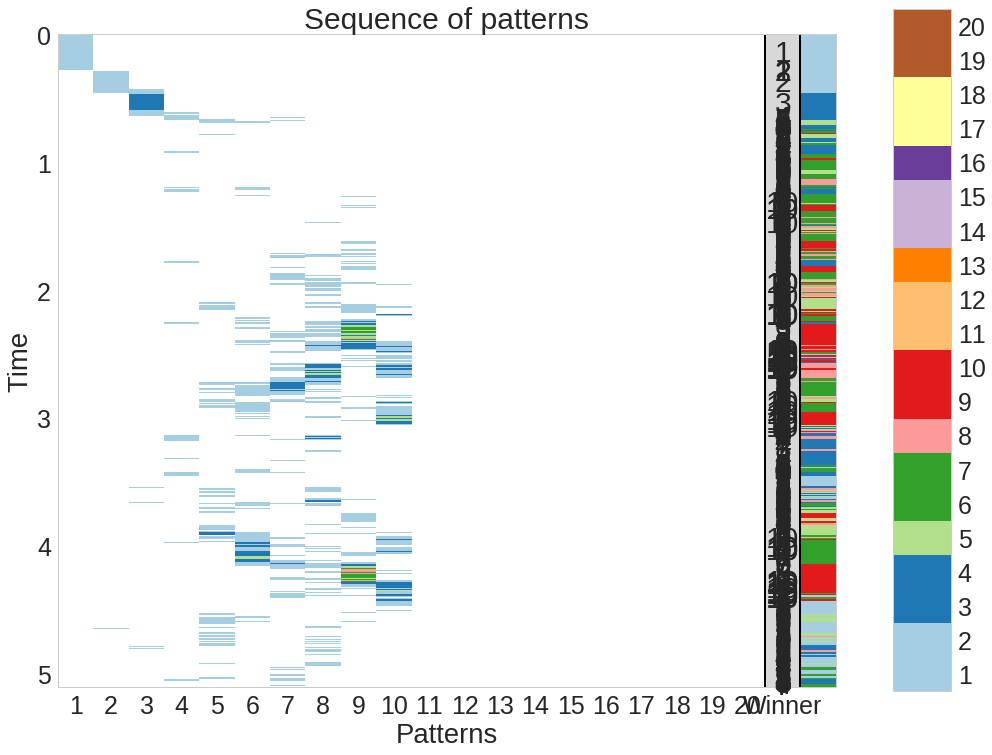

In [77]:
plot_winning_pattern(manager)

In [32]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 20
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

sigma_vector = np.arange(0, 42, 1.0)

success_list = []
for sigma in sigma_vector:
    print(sigma)
    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, sigma=sigma, tau_p=10.0)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    success_list.append(aux[3])
    print(aux[0])

0.0
3.018
1.0
3.008
2.0
3.011
3.0
3.016
4.0
3.018
5.0
3.004
6.0
2.99
7.0
2.955
8.0
2.979
9.0
2.918
10.0
2.926
11.0
2.845
12.0
2.856
13.0
2.94
14.0
2.827
15.0
2.833
16.0
2.834
17.0
2.829
18.0
2.775
19.0
2.675
20.0
2.596
21.0
2.661
22.0
2.549
23.0
2.56
24.0
0
25.0
2.647
26.0
0
27.0
0
28.0
2.348
29.0
2.06
30.0
0
31.0
0
32.0
0
33.0
0
34.0
0
35.0
0
36.0
0
37.0
0
38.0
0
39.0
0
40.0
0
41.0
0


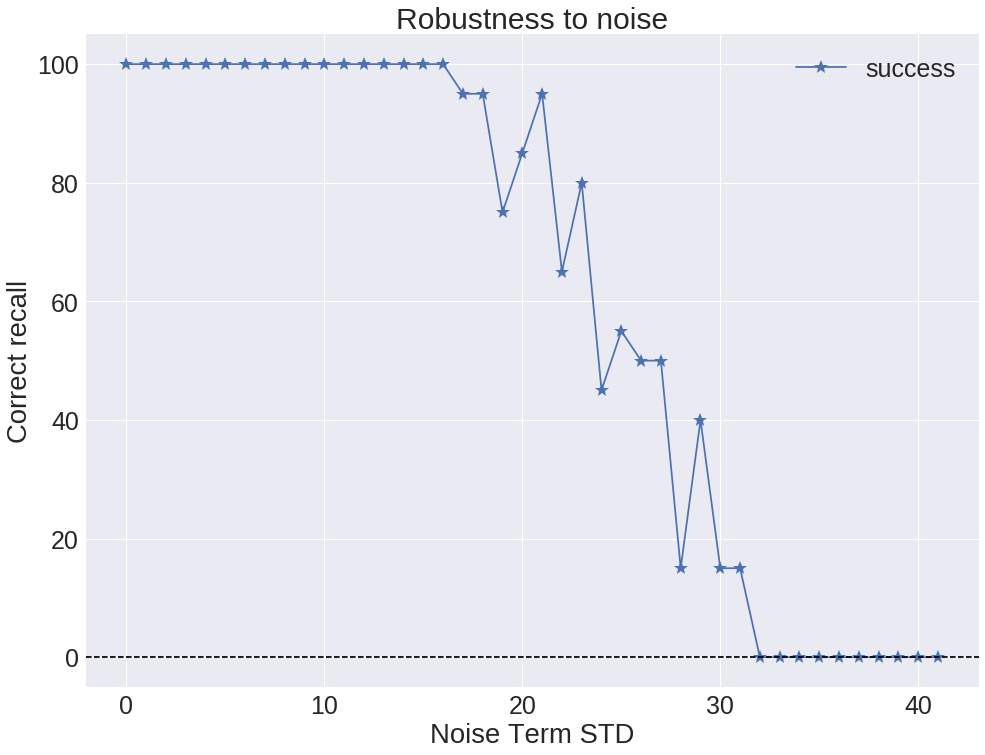

In [33]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(sigma_vector, success_list, '*-', markersize=14, label='success')

ax.set_xlabel('Noise Term STD')
ax.set_ylabel('Correct recall')

ax.axhline(0, ls='--', color='black')

ax.set_title('Robustness to noise')

ax.legend();

## How long can you chain be?

In [34]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 20.0
T_cue = 0.100
n = 20
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

sigma = 13.0
n_patterns_vector = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
success_list = []
for n_patterns in n_patterns_vector:
    print(n_patterns)
    T_recall = 0.5 * n_patterns
    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, sigma=sigma, tau_p=10.0)


    # Build the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

    # Build the protocol for training
    protocol = Protocol()
    patterns_indexes = [i for i in range(n_patterns)]
    protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                             inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)
    
    aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
    success_list.append(aux[3])

5
10
15
20
25
30
35
40
45
50


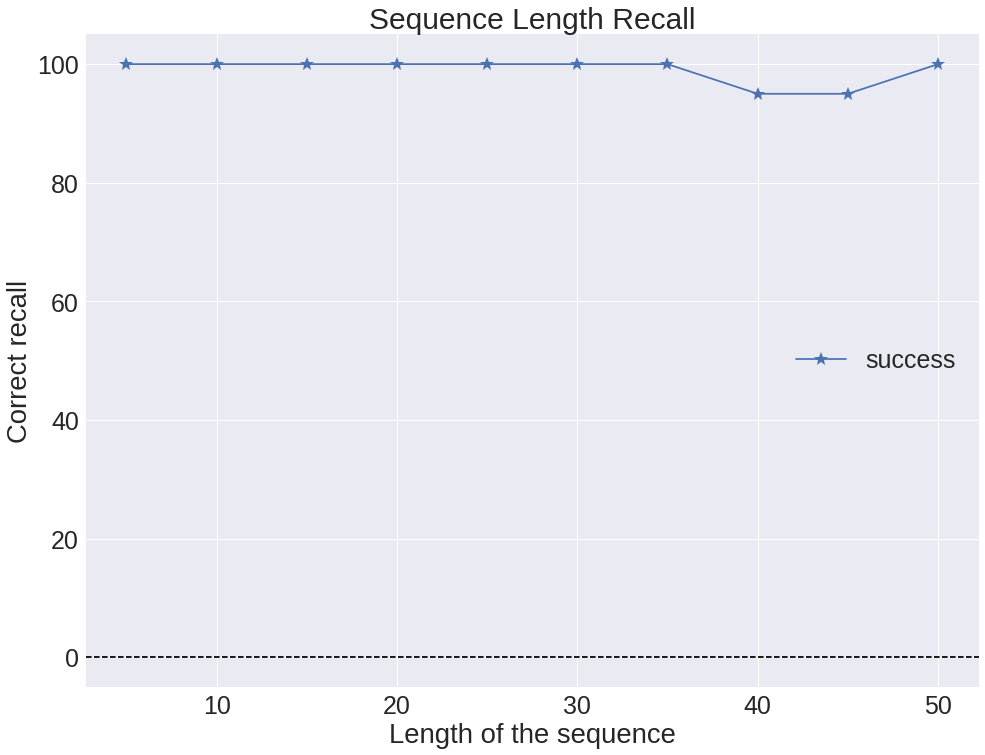

In [35]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(n_patterns_vector, success_list, '*-', markersize=14, label='success')

ax.set_xlabel('Length of the sequence')
ax.set_ylabel('Correct recall')

ax.axhline(0, ls='--', color='black')

ax.set_title('Sequence Length Recall')

ax.legend();

In [13]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 1

n_patterns_vector = [5, 10, 15, 20, 25]
sigma_vector = np.arange(1, 21, 3.0)
success_array = np.zeros((sigma_vector.size, len(n_patterns_vector)))
for sigma_index, sigma in enumerate(sigma_vector):
    print(sigma)
    for n_index, n_patterns in enumerate(n_patterns_vector):
        # Build the network
        nn = BCPNNFast(hypercolumns, minicolumns, sigma=sigma, tau_p=10.0)


        # Build the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build the protocol for training
        protocol = Protocol()
        patterns_indexes = [i for i in range(n_patterns)]
        protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                                 inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        # Train
        epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)

        aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, [patterns_indexes])
        success_array[sigma_index, n_index] = aux[3]

1.0
4.0
7.0
10.0
13.0
16.0
19.0


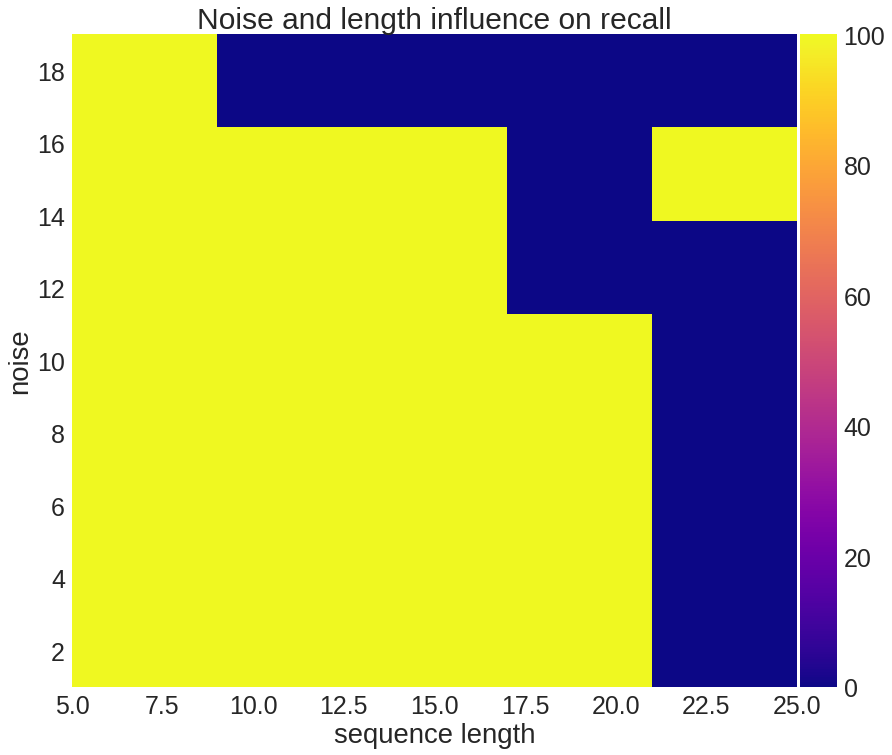

In [21]:
cmap = 'inferno'

extent = [n_patterns_vector[0], n_patterns_vector[-1], sigma_vector[0], sigma_vector[-1]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(success_array, cmap='plasma', origin='lower', extent=extent)

ax.grid()
ax.set_xlabel('sequence length')
ax.set_ylabel('noise')

ax.set_title('Noise and length influence on recall')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax.get_figure().colorbar(im, ax=ax, cax=cax)

## Recall time

In [ ]:
# Patterns parameters
hypercolumns = 4
minicolumns = 20
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 25.0
T_cue = 0.100
n = 1.0
values_to_save = ['o']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 0.1
inter_pulse_interval = 0.0
epochs = 3

# Parameters


# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=False)